In [1]:
from sqlalchemy import create_engine
import api_keys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DB_USER = api_keys.DB_USER
DB_PASS = api_keys.DB_PASS
DB_URL = api_keys.DB_URL

engine = create_engine("mysql+pymysql://{0}:{1}@{2}".format(DB_USER, DB_PASS, DB_URL), echo=True) 
connection = engine.connect()

statement = """SELECT * FROM dublin_bikes.weather_forecast_1hour
                    order by time_queried desc
                    limit 500;""" # create select statement for stations table

2021-03-20 13:44:59,577 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-03-20 13:44:59,577 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 13:44:59,709 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-03-20 13:44:59,709 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 13:44:59,957 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-03-20 13:44:59,957 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 13:45:00,212 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-03-20 13:45:00,212 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 13:45:00,712 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-03-20 13:45:00,712 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 13:45:00,831 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-03-20 13:45:00,831 INFO sqlalchemy.engine.base.E

In [3]:
df = pd.read_sql_query(statement, engine) # https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe

2021-03-20 13:45:02,588 INFO sqlalchemy.engine.base.Engine SELECT * FROM dublin_bikes.weather_forecast_1hour
                    order by time_queried desc
                    limit 500;
2021-03-20 13:45:02,588 INFO sqlalchemy.engine.base.Engine {}


In [ ]:
# the following notebook is based off material presented in Data Analytics module COMP47350 labs 7 and 9

In [4]:
df.shape

(500, 12)

In [5]:
df.head(5)

,station_number,time_queried,last_update,temp,feels_like,pressure,humidity,visibility,wind_speed,wind_deg,weather_main,weather_description
0,21,2021-03-03 13:08:25,2021-03-05 01:00:00,278,273,1030,83,10000,5,94,Clouds,broken clouds
1,21,2021-03-03 13:08:25,2021-03-05 02:00:00,278,273,1030,82,10000,4,97,Clouds,broken clouds
2,21,2021-03-03 13:08:25,2021-03-05 03:00:00,277,273,1030,84,10000,4,99,Clouds,broken clouds
3,21,2021-03-03 13:08:25,2021-03-05 04:00:00,278,273,1030,84,10000,4,101,Clouds,broken clouds
4,21,2021-03-03 13:08:25,2021-03-05 05:00:00,278,274,1030,84,10000,3,104,Clouds,broken clouds


In [6]:
df.tail(5)

,station_number,time_queried,last_update,temp,feels_like,pressure,humidity,visibility,wind_speed,wind_deg,weather_main,weather_description
495,41,2021-03-03 13:08:21,2021-03-04 01:00:00,278,275,1026,89,10000,2,26,Clouds,overcast clouds
496,41,2021-03-03 13:08:21,2021-03-04 02:00:00,278,274,1026,89,10000,3,25,Clouds,overcast clouds
497,41,2021-03-03 13:08:21,2021-03-04 03:00:00,278,274,1026,87,10000,3,20,Clouds,overcast clouds
498,41,2021-03-03 13:08:21,2021-03-04 04:00:00,278,274,1026,85,10000,3,19,Clouds,overcast clouds
499,41,2021-03-03 13:08:21,2021-03-04 05:00:00,278,274,1026,84,10000,3,23,Clouds,overcast clouds


In [7]:
df.dtypes

station_number                  int64
time_queried           datetime64[ns]
last_update            datetime64[ns]
temp                            int64
feels_like                      int64
pressure                        int64
humidity                        int64
visibility                      int64
wind_speed                      int64
wind_deg                        int64
weather_main                   object
weather_description            object
dtype: object

In [9]:
categorical_columns = df[['station_number','weather_main', 'weather_description']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  

continuous_columns = df.select_dtypes(['int64']).columns
datetime_columns = df.select_dtypes(['datetime64[ns]']).columns

df.dtypes

station_number               category
time_queried           datetime64[ns]
last_update            datetime64[ns]
temp                            int64
feels_like                      int64
pressure                        int64
humidity                        int64
visibility                      int64
wind_speed                      int64
wind_deg                        int64
weather_main                 category
weather_description          category
dtype: object

In [10]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [11]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


# no duplicate rows or columns

In [15]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
station_number,500,12,103,48
weather_main,500,1,Clouds,500
weather_description,500,2,overcast clouds,361


# station_status is constant column

In [16]:
df.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
temp,500.0,278.282,0.901166,277.0,278.0,278.0,279.0,281.0
feels_like,500.0,274.156,1.008811,273.0,274.0,274.0,274.0,277.0
pressure,500.0,1027.886,2.023163,1026.0,1026.0,1027.0,1030.0,1032.0
humidity,500.0,81.796,6.636148,68.0,77.0,83.0,87.0,94.0
visibility,500.0,10000.000,0.000000,10000.0,10000.0,10000.0,10000.0,10000.0
wind_speed,500.0,3.368,1.017175,2.0,3.0,3.0,4.0,5.0
wind_deg,500.0,69.756,36.938399,17.0,39.0,67.0,97.0,147.0


In [17]:
df.select_dtypes(include=['datetime64[ns]']).describe().T

,count,unique,top,freq,first,last
time_queried,500,5,2021-03-03 13:08:24,132,2021-03-03 13:08:21,2021-03-03 13:08:25
last_update,500,48,2021-03-04 01:00:00,11,2021-03-03 13:00:00,2021-03-05 12:00:00


In [18]:
df.isnull().sum()

station_number         0
time_queried           0
last_update            0
temp                   0
feels_like             0
pressure               0
humidity               0
visibility             0
wind_speed             0
wind_deg               0
weather_main           0
weather_description    0
dtype: int64

# logical integrity

In [20]:
test_1 = df[['time_queried','last_update']][df['time_queried']>df['last_update']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(5)

Number of rows failing the test:  10


,time_queried,last_update
12,2021-03-03 13:08:25,2021-03-03 13:00:00
60,2021-03-03 13:08:24,2021-03-03 13:00:00
108,2021-03-03 13:08:24,2021-03-03 13:00:00
156,2021-03-03 13:08:24,2021-03-03 13:00:00
224,2021-03-03 13:08:23,2021-03-03 13:00:00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002208B683FD0>,
      dtype=object)

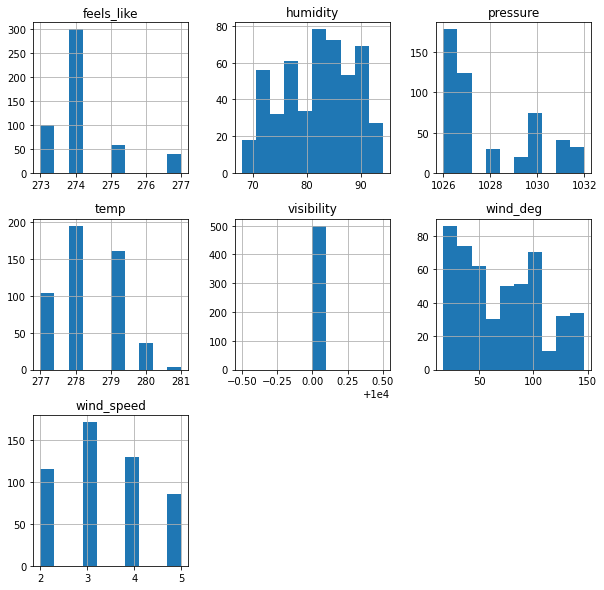

In [22]:
df[continuous_columns].hist(layout=(3, 3), figsize=(10,10), bins=10)

temp             AxesSubplot(0.125,0.657941;0.227941x0.222059)
feels_like    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
pressure      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
humidity         AxesSubplot(0.125,0.391471;0.227941x0.222059)
visibility    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
wind_speed    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
wind_deg            AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

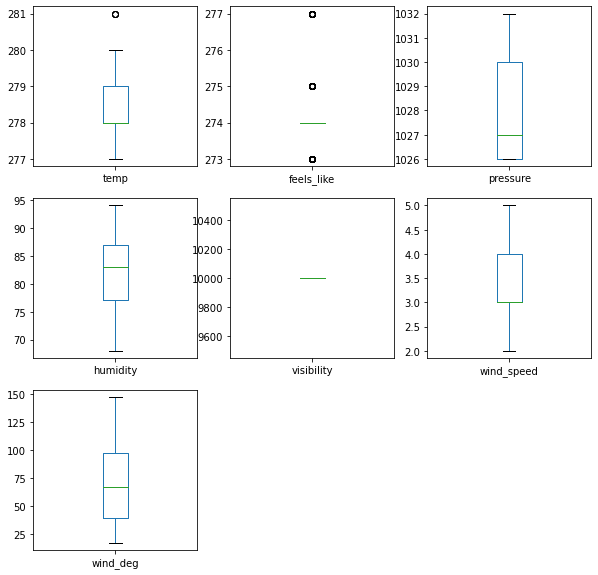

In [24]:
df[continuous_columns].plot(kind='box', subplots=True, figsize=(10,10), layout=(3,3), sharex=False, sharey=False)

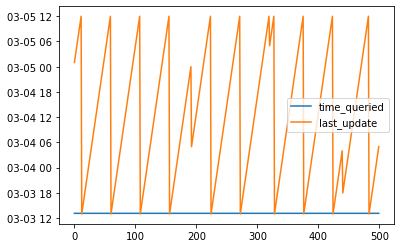

In [25]:
df[datetime_columns].plot()

time_queried


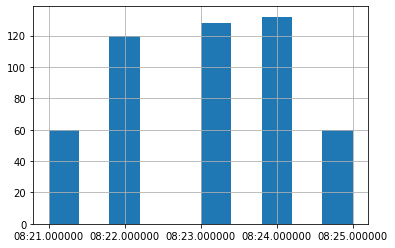

In [26]:
print(datetime_columns[0])
df[datetime_columns[0]].hist()

last_update


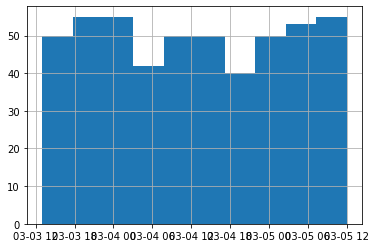

In [27]:
print(datetime_columns[1])
df[datetime_columns[1]].hist()

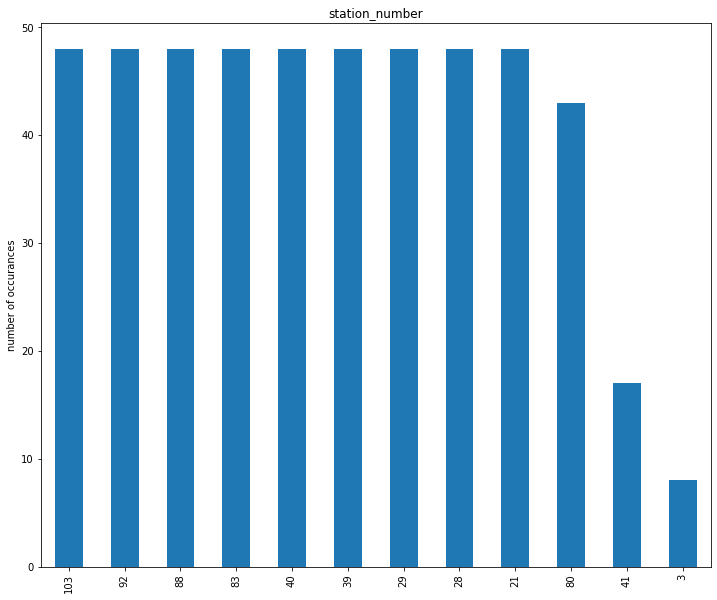

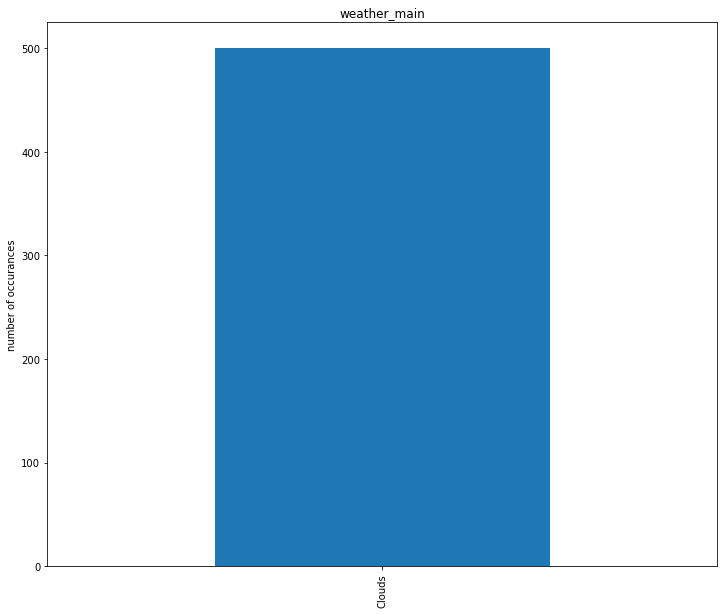

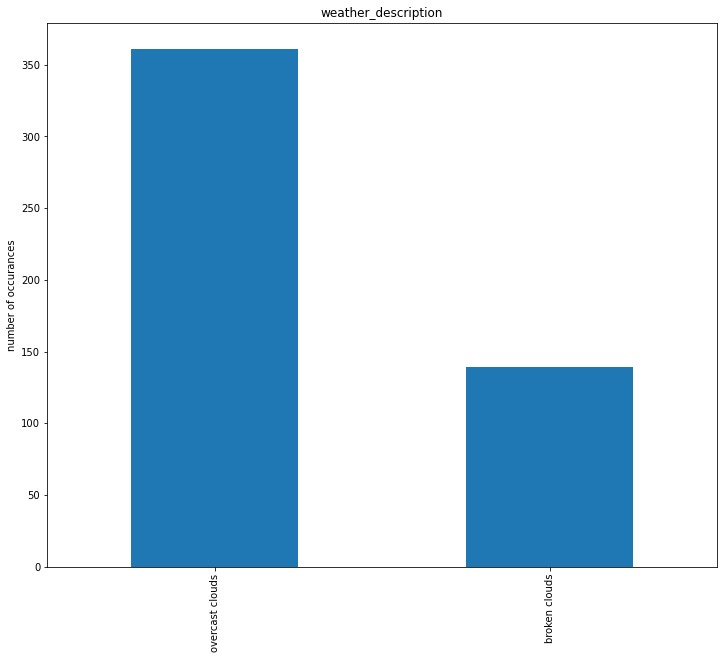

In [28]:
for col in categorical_columns:
    f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
    plt.title(col)
    plt.ylabel('number of occurances')
    plt.show()